**Import thư viện**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Explore Data Analysis**

In [2]:
df = pd.read_csv('ex2.csv',encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


**InvoiceNo: Số hóa đơn**\
**StockCode: Mã sản phẩm**\
**Description: Mô tả**\
**Quantity: Số lượng**\
**InvoiceDate: Ngày trên hóa đơn (ngày giờ mua hàng)**\
**UnitPrice: Đơn giá**\
**CustomerID: Mã số khách hàng**\
**Country: Quốc gia**


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#drop na
df1 = df.dropna(how='any')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
#đổi InvoiceDate sang datetime
#from datetime import datetime, timedelta
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5052\191356495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


In [ ]:
#df1['Year'] = pd.DatetimeIndex(df1['InvoiceDate']).year
#df1['Month'] = pd.DatetimeIndex(df1['InvoiceDate']).month
#df1['Day'] = pd.DatetimeIndex(df1['InvoiceDate']).day

In [9]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df1['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [11]:
361878/406829

0.8895088599878573

Vì dữ liệu từ UK chiếm 89% và dữ liệu từ các khu vực còn lại khá nhỏ (không đáng kể) nên ta sẽ phân tích ở khu vực UK

In [11]:
df2 = df1[df1['Country']=='United Kingdom']

In [13]:
df2['Country'].value_counts()

United Kingdom    361878
Name: Country, dtype: int64

In [12]:
df2['CustomerID'] = df2['CustomerID'].astype('int')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5052\247936789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CustomerID'] = df2['CustomerID'].astype('int')


In [13]:
df2.reset_index(inplace=True)
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [14]:
df2.drop('index',axis = 1,inplace=True)
df2.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5052\806260302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('index',axis = 1,inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


**Tính RFM: Recency - Frequency - Monetary Value**

## Tính Recency - Ngày mua hàng gần nhất

In [15]:
recency = df2.groupby('CustomerID').agg({'InvoiceDate':'max'}).reset_index()
recency

,CustomerID,InvoiceDate
0,12346,2011-01-18 10:17:00
1,12747,2011-11-17 17:13:00
2,12748,2011-12-05 18:58:00
3,12749,2011-11-17 12:05:00
4,12820,2011-10-26 13:27:00
...,...,...
3945,18280,2011-07-03 09:52:00
3946,18281,2011-12-06 10:53:00
3947,18282,2011-09-08 15:10:00
3948,18283,2011-11-30 12:59:00


In [16]:
recency = recency.rename(columns={'InvoiceDate':'MaxInvoiceDate'})
recency

,CustomerID,MaxInvoiceDate
0,12346,2011-01-18 10:17:00
1,12747,2011-11-17 17:13:00
2,12748,2011-12-05 18:58:00
3,12749,2011-11-17 12:05:00
4,12820,2011-10-26 13:27:00
...,...,...
3945,18280,2011-07-03 09:52:00
3946,18281,2011-12-06 10:53:00
3947,18282,2011-09-08 15:10:00
3948,18283,2011-11-30 12:59:00


In [17]:
recency['MaxInvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

Vì dữ liệu đến ngày 10 tháng 12 năm 2011 nên ta giả định ngày phân tích là ngày hôm sau tức ngày 11 tháng 12 năm 2011

In [18]:
recency['Recency'] = (recency['MaxInvoiceDate'].max() - recency['MaxInvoiceDate']).dt.days +1
recency

,CustomerID,MaxInvoiceDate,Recency
0,12346,2011-01-18 10:17:00,327
1,12747,2011-11-17 17:13:00,24
2,12748,2011-12-05 18:58:00,5
3,12749,2011-11-17 12:05:00,24
4,12820,2011-10-26 13:27:00,46
...,...,...,...
3945,18280,2011-07-03 09:52:00,161
3946,18281,2011-12-06 10:53:00,5
3947,18282,2011-09-08 15:10:00,94
3948,18283,2011-11-30 12:59:00,11


## Frequency - Tần suất mua hàng

In [19]:
frequency = df2.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency

,CustomerID,InvoiceNo
0,12346,2
1,12747,11
2,12748,224
3,12749,8
4,12820,4
...,...,...
3945,18280,1
3946,18281,1
3947,18282,3
3948,18283,16


In [56]:
frequency = frequency.rename(columns ={'InvoiceNo':'Frequency'})
frequency

,CustomerID,Frequency
0,12346,2
1,12747,11
2,12748,224
3,12749,8
4,12820,4
...,...,...
3945,18280,1
3946,18281,1
3947,18282,3
3948,18283,16


## Monetary Value - Số tiền chi tiêu

In [58]:
#Tính revenue
df2['Revenue'] = df2['Quantity'] * df2['UnitPrice']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
361873,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804,United Kingdom,23.40
361874,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113,United Kingdom,23.60
361875,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113,United Kingdom,30.00
361876,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113,United Kingdom,214.80


In [59]:
monetary_value = df2.groupby('CustomerID')['Revenue'].sum().reset_index()
monetary_value

,CustomerID,Revenue
0,12346,0.00
1,12747,4196.01
2,12748,29072.10
3,12749,3868.20
4,12820,942.34
...,...,...
3945,18280,180.60
3946,18281,80.82
3947,18282,176.60
3948,18283,2094.88


In [60]:
df2[df2['CustomerID']== 12346 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
34256,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
34261,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6


In [61]:
#merge các giá trị thành 1 bảng
df3 = pd.merge(recency, frequency, on='CustomerID', how='inner')
rfm = pd.merge(df3, monetary_value, on='CustomerID', how='inner')
rfm

,CustomerID,MaxInvoiceDate,Recency,Frequency,Revenue
0,12346,2011-01-18 10:17:00,327,2,0.00
1,12747,2011-11-17 17:13:00,24,11,4196.01
2,12748,2011-12-05 18:58:00,5,224,29072.10
3,12749,2011-11-17 12:05:00,24,8,3868.20
4,12820,2011-10-26 13:27:00,46,4,942.34
...,...,...,...,...,...
3945,18280,2011-07-03 09:52:00,161,1,180.60
3946,18281,2011-12-06 10:53:00,5,1,80.82
3947,18282,2011-09-08 15:10:00,94,3,176.60
3948,18283,2011-11-30 12:59:00,11,16,2094.88


**Model Building**

## K-Means Clustering

In [62]:
rfm_bt = rfm[['Recency','Frequency','Revenue']]
rfm_bt

,Recency,Frequency,Revenue
0,327,2,0.00
1,24,11,4196.01
2,5,224,29072.10
3,24,8,3868.20
4,46,4,942.34
...,...,...,...
3945,161,1,180.60
3946,5,1,80.82
3947,94,3,176.60
3948,11,16,2094.88


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_bt)

StandardScaler()

In [64]:
scaled_features = scaler.transform(rfm_bt)

In [65]:
pd.DataFrame(scaled_features)

,0,1,2
0,1.970511,-0.347294,-0.261674
1,-0.687561,0.685265,0.379155
2,-0.854239,25.122514,4.178320
3,-0.687561,0.341079,0.329091
4,-0.494566,-0.117837,-0.117757
...,...,...,...
3945,0.514274,-0.462023,-0.234092
3946,-0.854239,-0.462023,-0.249331
3947,-0.073485,-0.232566,-0.234703
3948,-0.801604,1.258910,0.058263


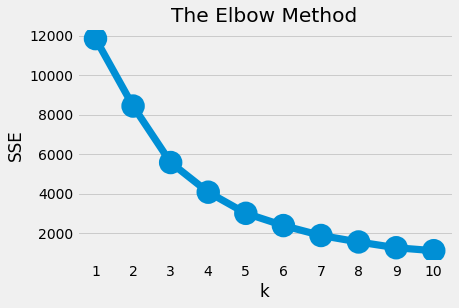

In [87]:
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse5[k] = kmeans.inertia_ 
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

==> Ta thấy ở vị trí số 3 thì độ dốc lớn nhất ==> chọn K=3

In [68]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_bt)

KMeans(n_clusters=3, random_state=42)

In [69]:
rfm_bt['Cluster'] = model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
rfm_bt

,Recency,Frequency,Revenue,Cluster
0,327,2,0.00,0
1,24,11,4196.01,0
2,5,224,29072.10,2
3,24,8,3868.20,0
4,46,4,942.34,0
...,...,...,...,...
3945,161,1,180.60,0
3946,5,1,80.82,0
3947,94,3,176.60,0
3948,11,16,2094.88,0


In [71]:
rfm_bt.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Revenue':'mean'})

,Recency,Frequency,Revenue
Cluster,,,
0,103.006121,4.626116,1316.258790
1,8.500000,58.500000,221960.330000
2,17.925926,59.296296,43070.445185


Ta có thể thấy:
- Cụm 0 là tệp khách hàng đã lâu chưa mua hàng, số lần mua ít vì vậy mang lại ít doanh thu nhất
- Cụm 1 là tệp khách hàng quan trọng của công ty, có thời điêm mua hàng gần nhất, số lần mua hàng nhiều và có khả năng chi tiêu rất lớn vì vậy mang lại doanh thu cao cho công ty
- Cụm 2 là tệp khách hàng có thời điểm mua hàng tương đối, số lần mua hàng nhiều và mang lại doanh thu tương đối

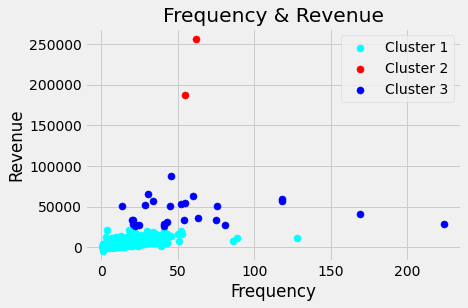

In [72]:
plt.scatter(rfm_bt[rfm_bt['Cluster']==0]['Frequency'], rfm_bt[rfm_bt['Cluster']==0]['Revenue'], s = 50, c = 'cyan', label = 'Cluster 1')
plt.scatter(rfm_bt[rfm_bt['Cluster']==1]['Frequency'], rfm_bt[rfm_bt['Cluster']==1]['Revenue'], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(rfm_bt[rfm_bt['Cluster']==2]['Frequency'], rfm_bt[rfm_bt['Cluster']==2]['Revenue'], s = 50, c = 'blue', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Frequency & Revenue')
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

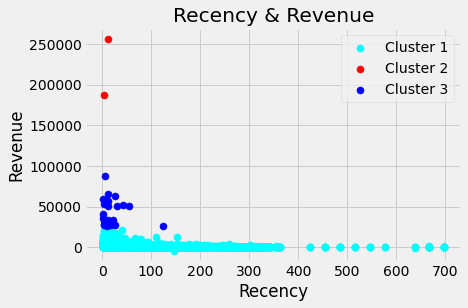

In [73]:
plt.scatter(rfm_bt[rfm_bt['Cluster']==0]['Recency'], rfm_bt[rfm_bt['Cluster']==0]['Revenue'], s = 50, c = 'cyan', label = 'Cluster 1')
plt.scatter(rfm_bt[rfm_bt['Cluster']==1]['Recency'], rfm_bt[rfm_bt['Cluster']==1]['Revenue'], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(rfm_bt[rfm_bt['Cluster']==2]['Recency'], rfm_bt[rfm_bt['Cluster']==2]['Revenue'], s = 50, c = 'blue', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Recency & Revenue')
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [74]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

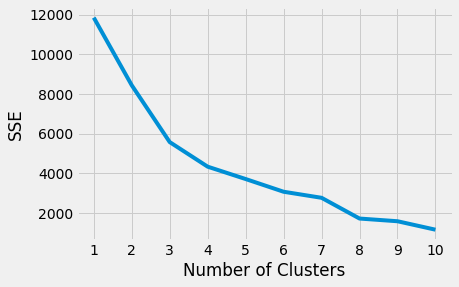

In [76]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

sse2 = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse2.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse2)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [77]:
#
kl = KneeLocator(range(1, 11), sse2, curve="convex", direction="decreasing")

kl.elbow

4

==> Vậy theo KneeLocator k=4 có độ cong lớn nhất

**Test K = 4**

In [78]:
rfm_bt1 = rfm[['Recency','Frequency','Revenue']]

model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_bt1)

rfm_bt1['Cluster'] = model.labels_
rfm_bt1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recency,Frequency,Revenue,Cluster
0,327,2,0.00,2
1,24,11,4196.01,2
2,5,224,29072.10,3
3,24,8,3868.20,2
4,46,4,942.34,2
...,...,...,...,...
3945,161,1,180.60,2
3946,5,1,80.82,2
3947,94,3,176.60,2
3948,11,16,2094.88,2


In [79]:
rfm_bt1.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Revenue':'mean'})

,Recency,Frequency,Revenue
Cluster,,,
0,21.802575,20.510730,7775.420687
1,8.500000,58.500000,221960.330000
2,108.136388,3.622560,908.182672
3,17.925926,59.296296,43070.445185


Với số cụm là 4 ta có thể thấy:
- Cụm 0 là tệp khách hàng có thời điểm mua hàng gần nhất xa và số lượng đơn hàng tương đối nhưng mang lại doanh thu thấp --> có thể là tệp khách này chỉ mua hàng vào các đợt có khuyến mãi
- Cụm 1 là tệp khách hàng quan trọng có thời điểm mua hàng gần nhất với số lượng đơn hàng lớn và có mức chi tiêu cao đem lại doanh thu cực lớn cho công ty
- Cụm 2 là tệp khách hàng đã lâu chưa mua hàng, số lượng đơn hàng thấp và giá trị đơn hàng cực nhỏ --> có thể đây là tệp khách vãng lai có mức chi tiêu cực thấp mua hàng do công ty khuyến mãi đúng mặt hàng nhu cầu và không phải khách hàng thương xuyên của công ty
- Cụm 3 là tệp khách hàng quen, có thời điểm mua hàng tương đối, có số lượng đơn hàng lớn và chi tiêu ở mức khá

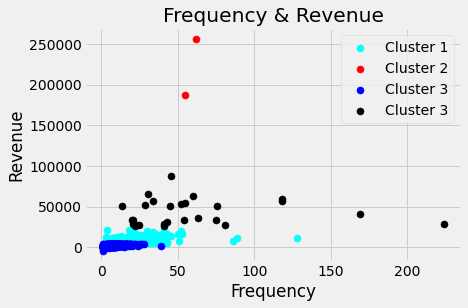

In [80]:
plt.scatter(rfm_bt[rfm_bt1['Cluster']==0]['Frequency'], rfm_bt[rfm_bt1['Cluster']==0]['Revenue'], s = 50, c = 'cyan', label = 'Cluster 1')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==1]['Frequency'], rfm_bt[rfm_bt1['Cluster']==1]['Revenue'], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==2]['Frequency'], rfm_bt[rfm_bt1['Cluster']==2]['Revenue'], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==3]['Frequency'], rfm_bt[rfm_bt1['Cluster']==3]['Revenue'], s = 50, c = 'black', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Frequency & Revenue')
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

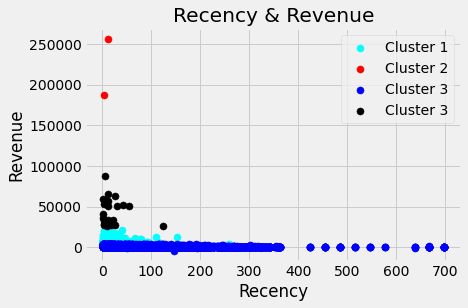

In [81]:
plt.scatter(rfm_bt[rfm_bt1['Cluster']==0]['Recency'], rfm_bt[rfm_bt1['Cluster']==0]['Revenue'], s = 50, c = 'cyan', label = 'Cluster 1')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==1]['Recency'], rfm_bt[rfm_bt1['Cluster']==1]['Revenue'], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==2]['Recency'], rfm_bt[rfm_bt1['Cluster']==2]['Revenue'], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(rfm_bt[rfm_bt1['Cluster']==3]['Recency'], rfm_bt[rfm_bt1['Cluster']==3]['Revenue'], s = 50, c = 'black', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Recency & Revenue')
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.legend()
plt.show()

**==> Nhìn chung với k=3 hay k=4 đều khả thi, tùy vào mục tiêu và chiến lược nhắm đến của công ty mà có thể phân tệp khách hàng thành 3 hoặc 4 cụm**

## Hierarchical Clustering

In [82]:
hiera = rfm[['Recency','Frequency','Revenue']]
hiera

,Recency,Frequency,Revenue
0,327,2,0.00
1,24,11,4196.01
2,5,224,29072.10
3,24,8,3868.20
4,46,4,942.34
...,...,...,...
3945,161,1,180.60
3946,5,1,80.82
3947,94,3,176.60
3948,11,16,2094.88


In [83]:
from sklearn.preprocessing import normalize
data_scaled = normalize(hiera)
data_scaled = pd.DataFrame(data_scaled, columns=hiera.columns)
data_scaled.head()

,Recency,Frequency,Revenue
0,0.999981,0.006116,0.000000
1,0.005720,0.002621,0.999980
2,0.000172,0.007705,0.999970
3,0.006204,0.002068,0.999979
4,0.048756,0.004240,0.998802


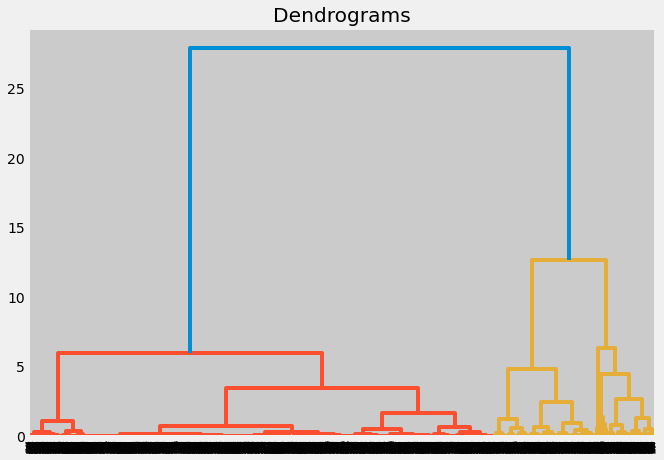

In [84]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

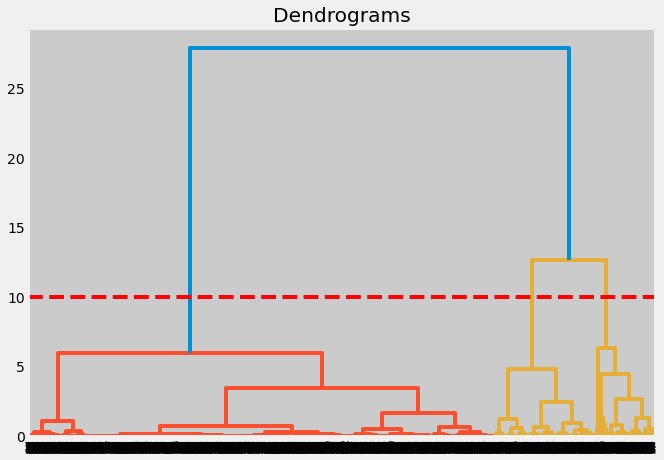

In [85]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

==> Dựa vào biểu đồ Dendrograms ta có thể thấy chia thành 3 cụm là khả thi nhất

**Kết luận**\
Dựa vào chỉ số **RFM** và mô hình **K-Means Clustering** vs **Hierarchical Clustering** công ty có thể chia khách hàng thành 3 tệp:
- Nhóm 1 là tệp khách ít khi mua hàng và có mức độ chi tiêu ít
- Nhóm 2 là tệp khách hay mua hàng và có mức độ chi tiêu nhỏ và vừa 
- Nhóm 3 là tệp khách hay mua hàng và mức độ chi tiêu lớn

==> Công ty có thể lên các chiến dịch nhắm vào từng nhóm khách hàng để có thể đạt hiệu quả cao nhất
